# MAFS 6010S: Music Recommendation Project

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cross_validation, grid_search, metrics, ensemble

In [18]:
train = pd.read_csv('train.csv')
train = train.sample(frac = 0.03)
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
data_1 = pd.merge(train, songs, on = 'song_id', how = 'left')
data = pd.merge(data_1, members, on = 'msno', how = 'inner')

In [19]:
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,o/oh525Ts0TGzSboVx8CN8mTbKRQGwe8gu9ZZVApjAY=,+DiueQ1/GKKJjAGHSzzLk9q3PzGPKmIcQi76TVgCOFY=,my library,Local playlist more,local-playlist,0,264288.0,458,藍又時 (Shadya Lan),藍又時,藍又時,3.0,1,0,NaN,7,20150320,20170920
1,o/oh525Ts0TGzSboVx8CN8mTbKRQGwe8gu9ZZVApjAY=,qG9e72ZD61XXBSjy47BqsdjnHwlCDpy1BmKpNUzmu7A=,search,Artist more,top-hits-for-artist,0,243345.0,1609,Zedd,Anton Zaslavski| Matthew Bair,NaN,52.0,1,0,NaN,7,20150320,20170920
2,o/oh525Ts0TGzSboVx8CN8mTbKRQGwe8gu9ZZVApjAY=,gd0rw4wxhlmJnPSqIV9HvYdU8UKQl6gle+0ANQoPQI8=,my library,Local playlist more,local-playlist,0,186331.0,1609,David Guetta,David Guetta| Giorgio Tuinfort| Thomas Troelse...,NaN,52.0,1,0,NaN,7,20150320,20170920
3,o/oh525Ts0TGzSboVx8CN8mTbKRQGwe8gu9ZZVApjAY=,qbLPCM181heribqDm1ckxyiqDTyt13rMzWxsPtHvYFM=,my library,Local playlist more,local-playlist,1,250044.0,444,Seo In Guk,Kim Han Beom,NaN,31.0,1,0,NaN,7,20150320,20170920
4,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,qQrTXeO5w+T15N+2ilDw5q1Xlx2pQcHMLjc3ekR8kM8=,my library,Local playlist more,local-library,0,211365.0,444,B.A.P,MARCO| JEUN DA WOON,MARCO| Bang Yong Guk| JEUN DA WOON,31.0,18,19,female,9,20111012,20180929
5,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,3z8V+OXkURJCh4RIKCws7FS7oU5X2uiFuuy+rlyIiUA=,my library,Local playlist more,local-library,0,200620.0,444,Girl's Day,NaN,NaN,31.0,18,19,female,9,20111012,20180929
6,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,RpBqi476rLLvHsMXUL0ZKuRD3BPp/UbeCoZp5egKJUA=,my library,Local playlist more,local-library,0,195140.0,444,BTOB,Young Jin Son| Sung Ho Jo| Dong Ha Kang,NaN,31.0,18,19,female,9,20111012,20180929
7,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,3C/ZgU+KQxW1VQeGkZkCuhkYIMd6zV8V356TWtWI3lg=,my library,Local playlist more,local-library,0,187617.0,465,The Vamps,Ben Kohn| Pete Kelleher| Tom Barnes| Wayne Hec...,NaN,52.0,18,19,female,9,20111012,20180929
8,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,hpGpQSdhVi3+st7q+ZbIhHTlerJ6hHGfh1wc8R8cDAA=,my library,Local playlist more,local-library,1,285126.0,465,Twilight Soundtrack,NaN,NaN,52.0,18,19,female,9,20111012,20180929
9,py6Klyqzwd88aAUkh7THPWMTsBIV8CwsKxt4WIw+v6w=,hVUtusGfOqlJX7Xh8KBZ1R+LF1JJZCXwWsosfQ8jjz8=,my library,Local playlist more,local-library,0,248616.0,465,王詩安 (Diana Wang),李偉菘,馬嵩惟,3.0,18,19,female,9,20111012,20180929


In [20]:
for i in data.select_dtypes(include = ['object']).columns:
    data[i][data[i].isnull()] = 'unknown'
data = data.fillna(value = 0)

C:\Users\Thompson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


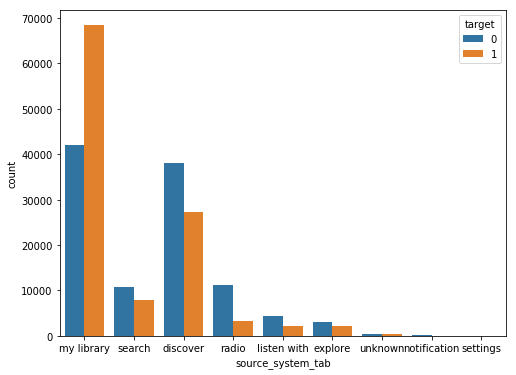

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data['source_system_tab'], hue = data['target'])

[Text(0,0,'album'),
 Text(0,0,'online-playlist'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'local-library'),
 Text(0,0,'radio'),
 Text(0,0,'listen-with'),
 Text(0,0,'local-playlist'),
 Text(0,0,'song'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'topic-article-playlist'),
 Text(0,0,'artist'),
 Text(0,0,'unknown'),
 Text(0,0,'my-daily-playlist')]

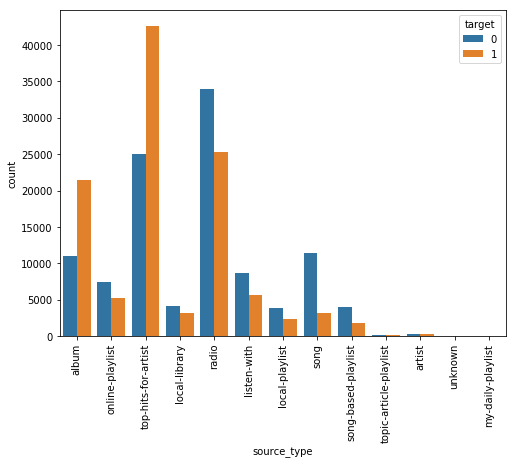

In [22]:
plt.figure(figsize = (8,6))
source_type_plot = sns.countplot(data['source_type'], hue = data['target'])
source_type_plot.set_xticklabels(labels,rotation = 90)

In [23]:
# Deal with registration_init_time and expiration_date 
data.expiration_date = pd.to_datetime(data.expiration_date, format = '%Y%m%d', errors = 'ignore')
data.registration_init_time = pd.to_datetime(data.registration_init_time, format = '%Y%m%d', errors = 'ignore')
data['expiration_year'] = data['expiration_date'].dt.year
data['expiration_month'] = data['expiration_date'].dt.month
data['expiration_day'] = data['expiration_date'].dt.day
data['registration_year'] = data['registration_init_time'].dt.year
data['registration_month'] = data['registration_init_time'].dt.month
data['registration_day'] = data['registration_init_time'].dt.day
data['expiration_date'] = data['expiration_date'].astype('category')
data['registration_init_time'] = data['registration_init_time'].astype('category')
for temp in data.select_dtypes(include = ['object']).columns:
    data[temp] = data[temp].astype('category') 
for temp in data.select_dtypes(include = ['category']).columns:
    data[temp] = data[temp].cat.codes

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221323 entries, 0 to 221322
Data columns (total 24 columns):
msno                      221323 non-null int16
song_id                   221323 non-null int32
source_system_tab         221323 non-null int8
source_screen_name        221323 non-null int8
source_type               221323 non-null int8
target                    221323 non-null int64
song_length               221323 non-null float64
genre_ids                 221323 non-null int16
artist_name               221323 non-null int16
composer                  221323 non-null int16
lyricist                  221323 non-null int16
language                  221323 non-null float64
city                      221323 non-null int64
bd                        221323 non-null int64
gender                    221323 non-null int8
registered_via            221323 non-null int64
registration_init_time    221323 non-null int16
expiration_date           221323 non-null int16
expiration_year          

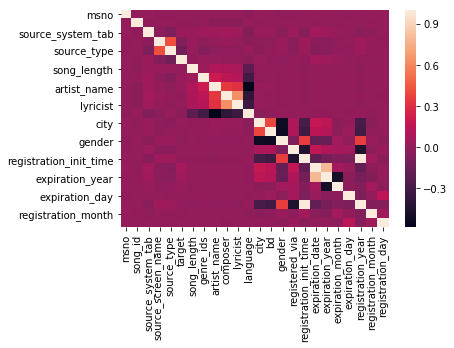

In [25]:
# Correlation matrix of factors
sns.heatmap(data.corr())
plt.show()

In [26]:
data_all = data.copy(deep = True)
data_all_1 = data_all.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data_all, data_all_1, test_size = 0.4)

In [27]:
# Random forest model
forest_model = ensemble.RandomForestClassifier(n_estimators = 300, max_depth = 30)
forest_model.fit(train_data, train_labels)
predict_labels = forest_model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

             precision    recall  f1-score   support

          0       0.66      0.63      0.64     44023
          1       0.65      0.67      0.66     44507

avg / total       0.65      0.65      0.65     88530



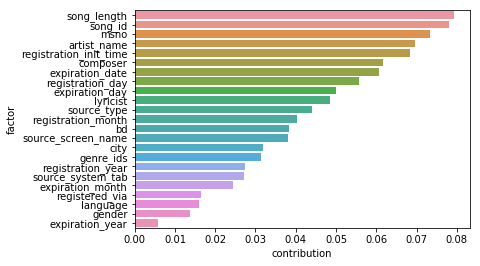

In [28]:
# Factor contributuion
factor_plot = pd.DataFrame({'factor': data_all.columns[data_all.columns != 'target'], 'contribution': forest_model.feature_importances_})
factor_plot = factor_plot.sort_values('contribution', ascending=False)
sns.barplot(x = factor_plot.contribution, y = factor_plot.factor)
plt.show()

In [29]:
# Select foctors with contribution > 0.04 (above registration_month)
data_all_improve = data.copy(deep = True)
data_all_improve = data_all_improve[['msno', 'song_id', 'song_length', 'source_type', 'artist_name', 'target', 'composer', 'expiration_day', 
                                     'registration_init_time', 'registration_month', 'registration_day']]

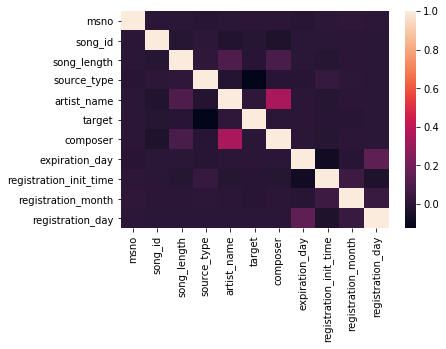

In [30]:
# Correlation matrix of remaining factors
sns.heatmap(data_all_improve.corr())
plt.show()

In [31]:
data_all_improve_1 = data_all_improve.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data_all_improve, data_all_improve_1, test_size = 0.4)

In [32]:
# Random forest model
forest_model_improve = ensemble.RandomForestClassifier(n_estimators = 300, max_depth = 30)
forest_model_improve.fit(train_data, train_labels)
predict_labels_improve = forest_model_improve.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels_improve))

             precision    recall  f1-score   support

          0       0.64      0.61      0.63     43938
          1       0.64      0.67      0.65     44592

avg / total       0.64      0.64      0.64     88530

